<h1>Visualisierung der aus England Corona Daten </h1>


In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2> list of the files</h2>

In [3]:
dir_name = 'data3'
filespath = dir_name + '/'
filtered = filter(lambda filename: not filename.startswith('~'), os.listdir('data3'))
fileslist = list(filtered)
fileslist

['Weekly_Influenza_and_COVID19_report_data_w27v2_2021.xlsx',
 'Weekly_Influenza_and_COVID19_report_data_W43_V2_2020.xlsx']

In [4]:
death_by_week_2021_df = pd.read_excel(filespath + fileslist[0],sheet_name="Fig48CleanData").reset_index()
death_by_week_2021_df.head(3)

,level_0,index,Week of death,28 day definition,60 day definition
0,0,0,27,220,412
1,1,1,28,170,340
2,2,2,29,120,260


In [5]:
death_by_week_2021_df.plot(x=death_by_week_2021_df.columns.tolist()[2],y=['28 day definition','60 day definition'],kind='bar',figsize=(30, 15))

In [6]:
death_by_age = pd.read_excel(filespath + fileslist[0],sheet_name="Fig45CleanData", header = 1).reset_index()
death_by_age.head(3)

,level_0,index,Week number,0 to 4,5 to 14,15 to 24,25 to 44,45 to 54,55 to 64,65 to 74,...,85+,Week number,0 to 4.1,5 to 14.1,15 to 44,45 to 54.1,55 to 64.1,65 to 74.1,75 to 84.1,85+
0,0,0,27,0.036917,0.000000,0.056062,0.075528,0.080420,0.188758,0.179959,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,28,0.000000,0.000000,0.000000,0.069633,0.116126,0.214026,0.277867,...,0.092541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,29,0.037294,0.018759,0.019234,0.042829,0.130765,0.076833,0.160056,...,0.090822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


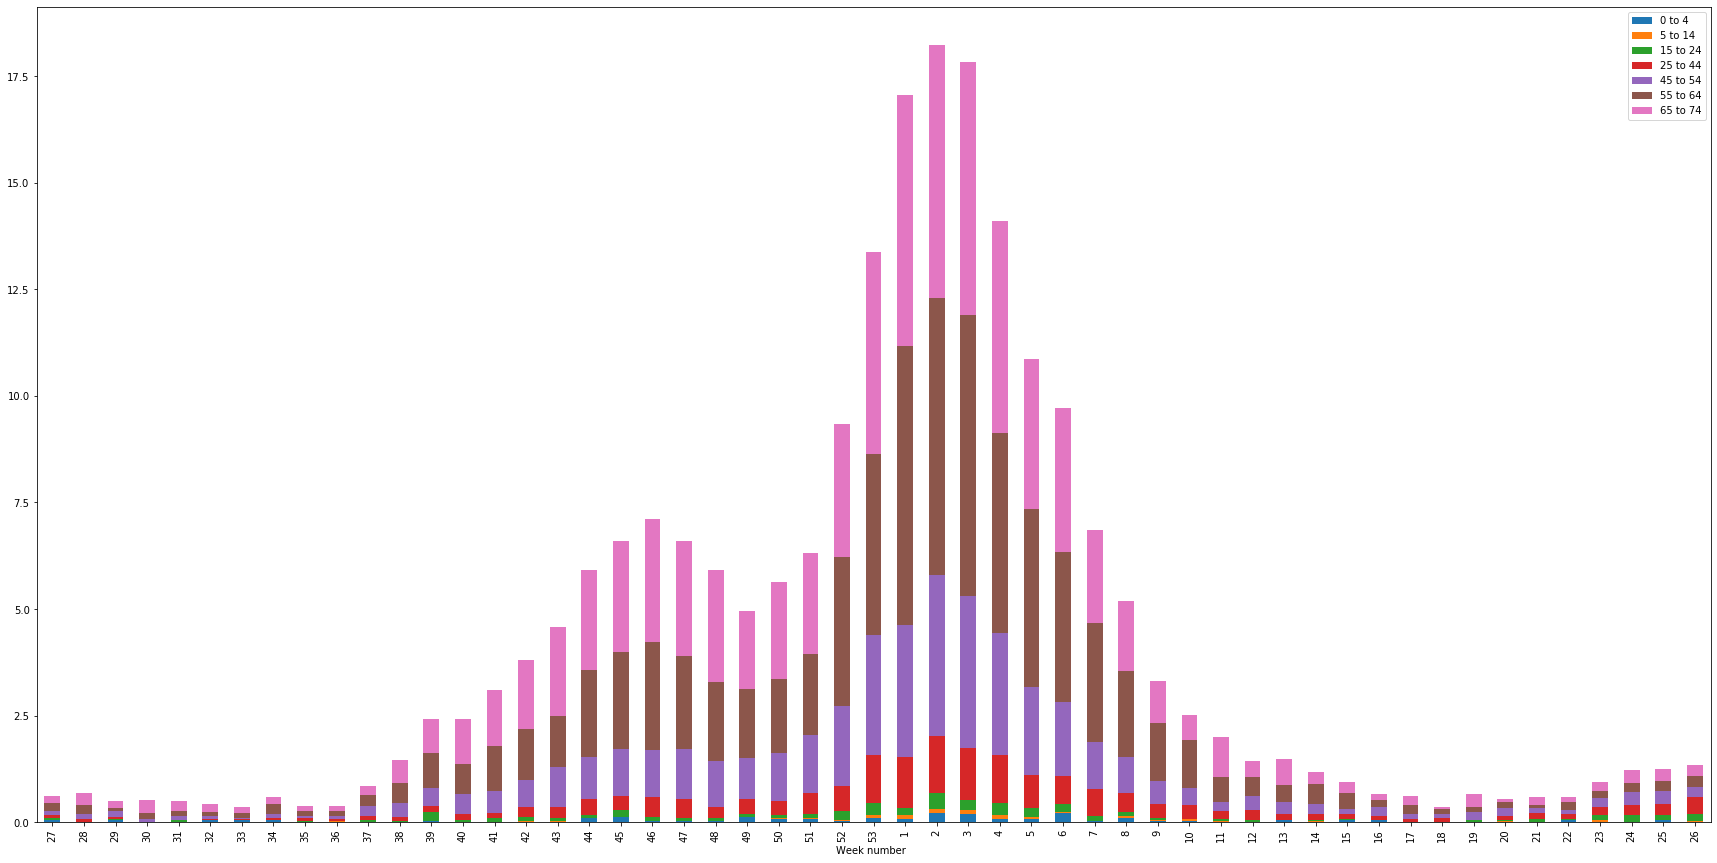

In [37]:
death_by_age.plot(x=death_by_age.columns[2],y=death_by_age.columns[3:10],kind='bar',figsize=(30, 15), subplots=False,stacked=True)

Index(['0 to 4', '5 to 14', '15 to 24', '25 to 44', '45 to 54', '55 to 64',
       '65 to 74', 'total'],
      dtype='object')


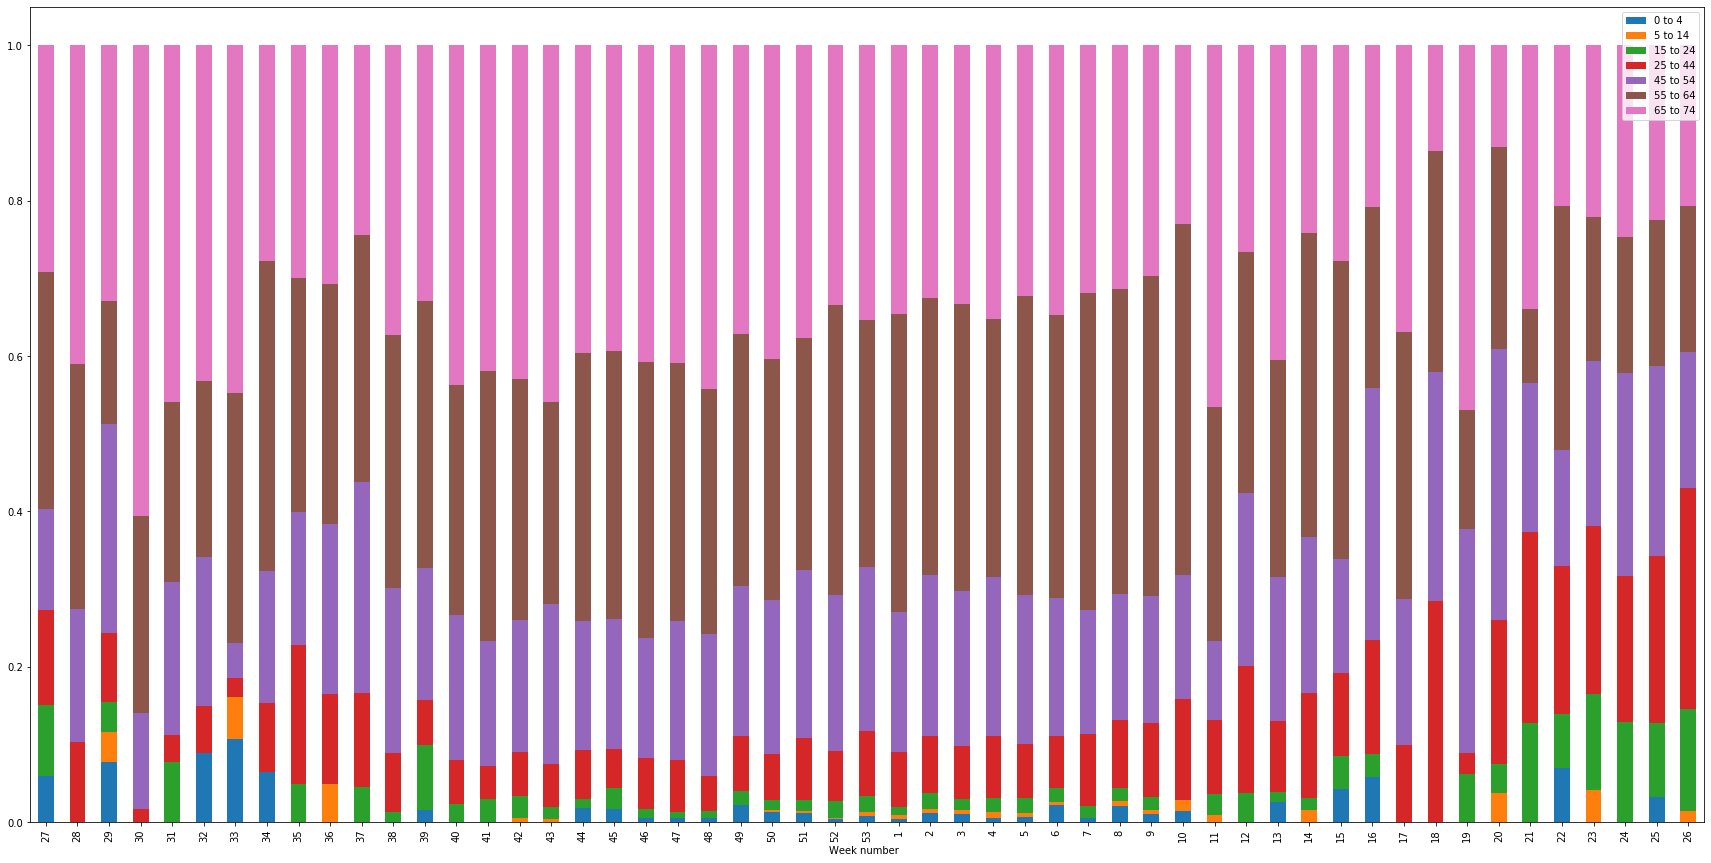

In [92]:
#tranform to Percentage data and plot
df1 = death_by_age.iloc[:,1:10]

df1['total'] = df1.loc[:,'0 to 4':].sum(axis = 1)
print(df1.columns[2:])
for c in df1.columns[2:-1]:
    df1[c] = df1[c] / df1['total']
df1.plot(x=df1.columns[1],y=df1.columns[2:-1],kind='bar',figsize=(30, 15), subplots=False,stacked=True)

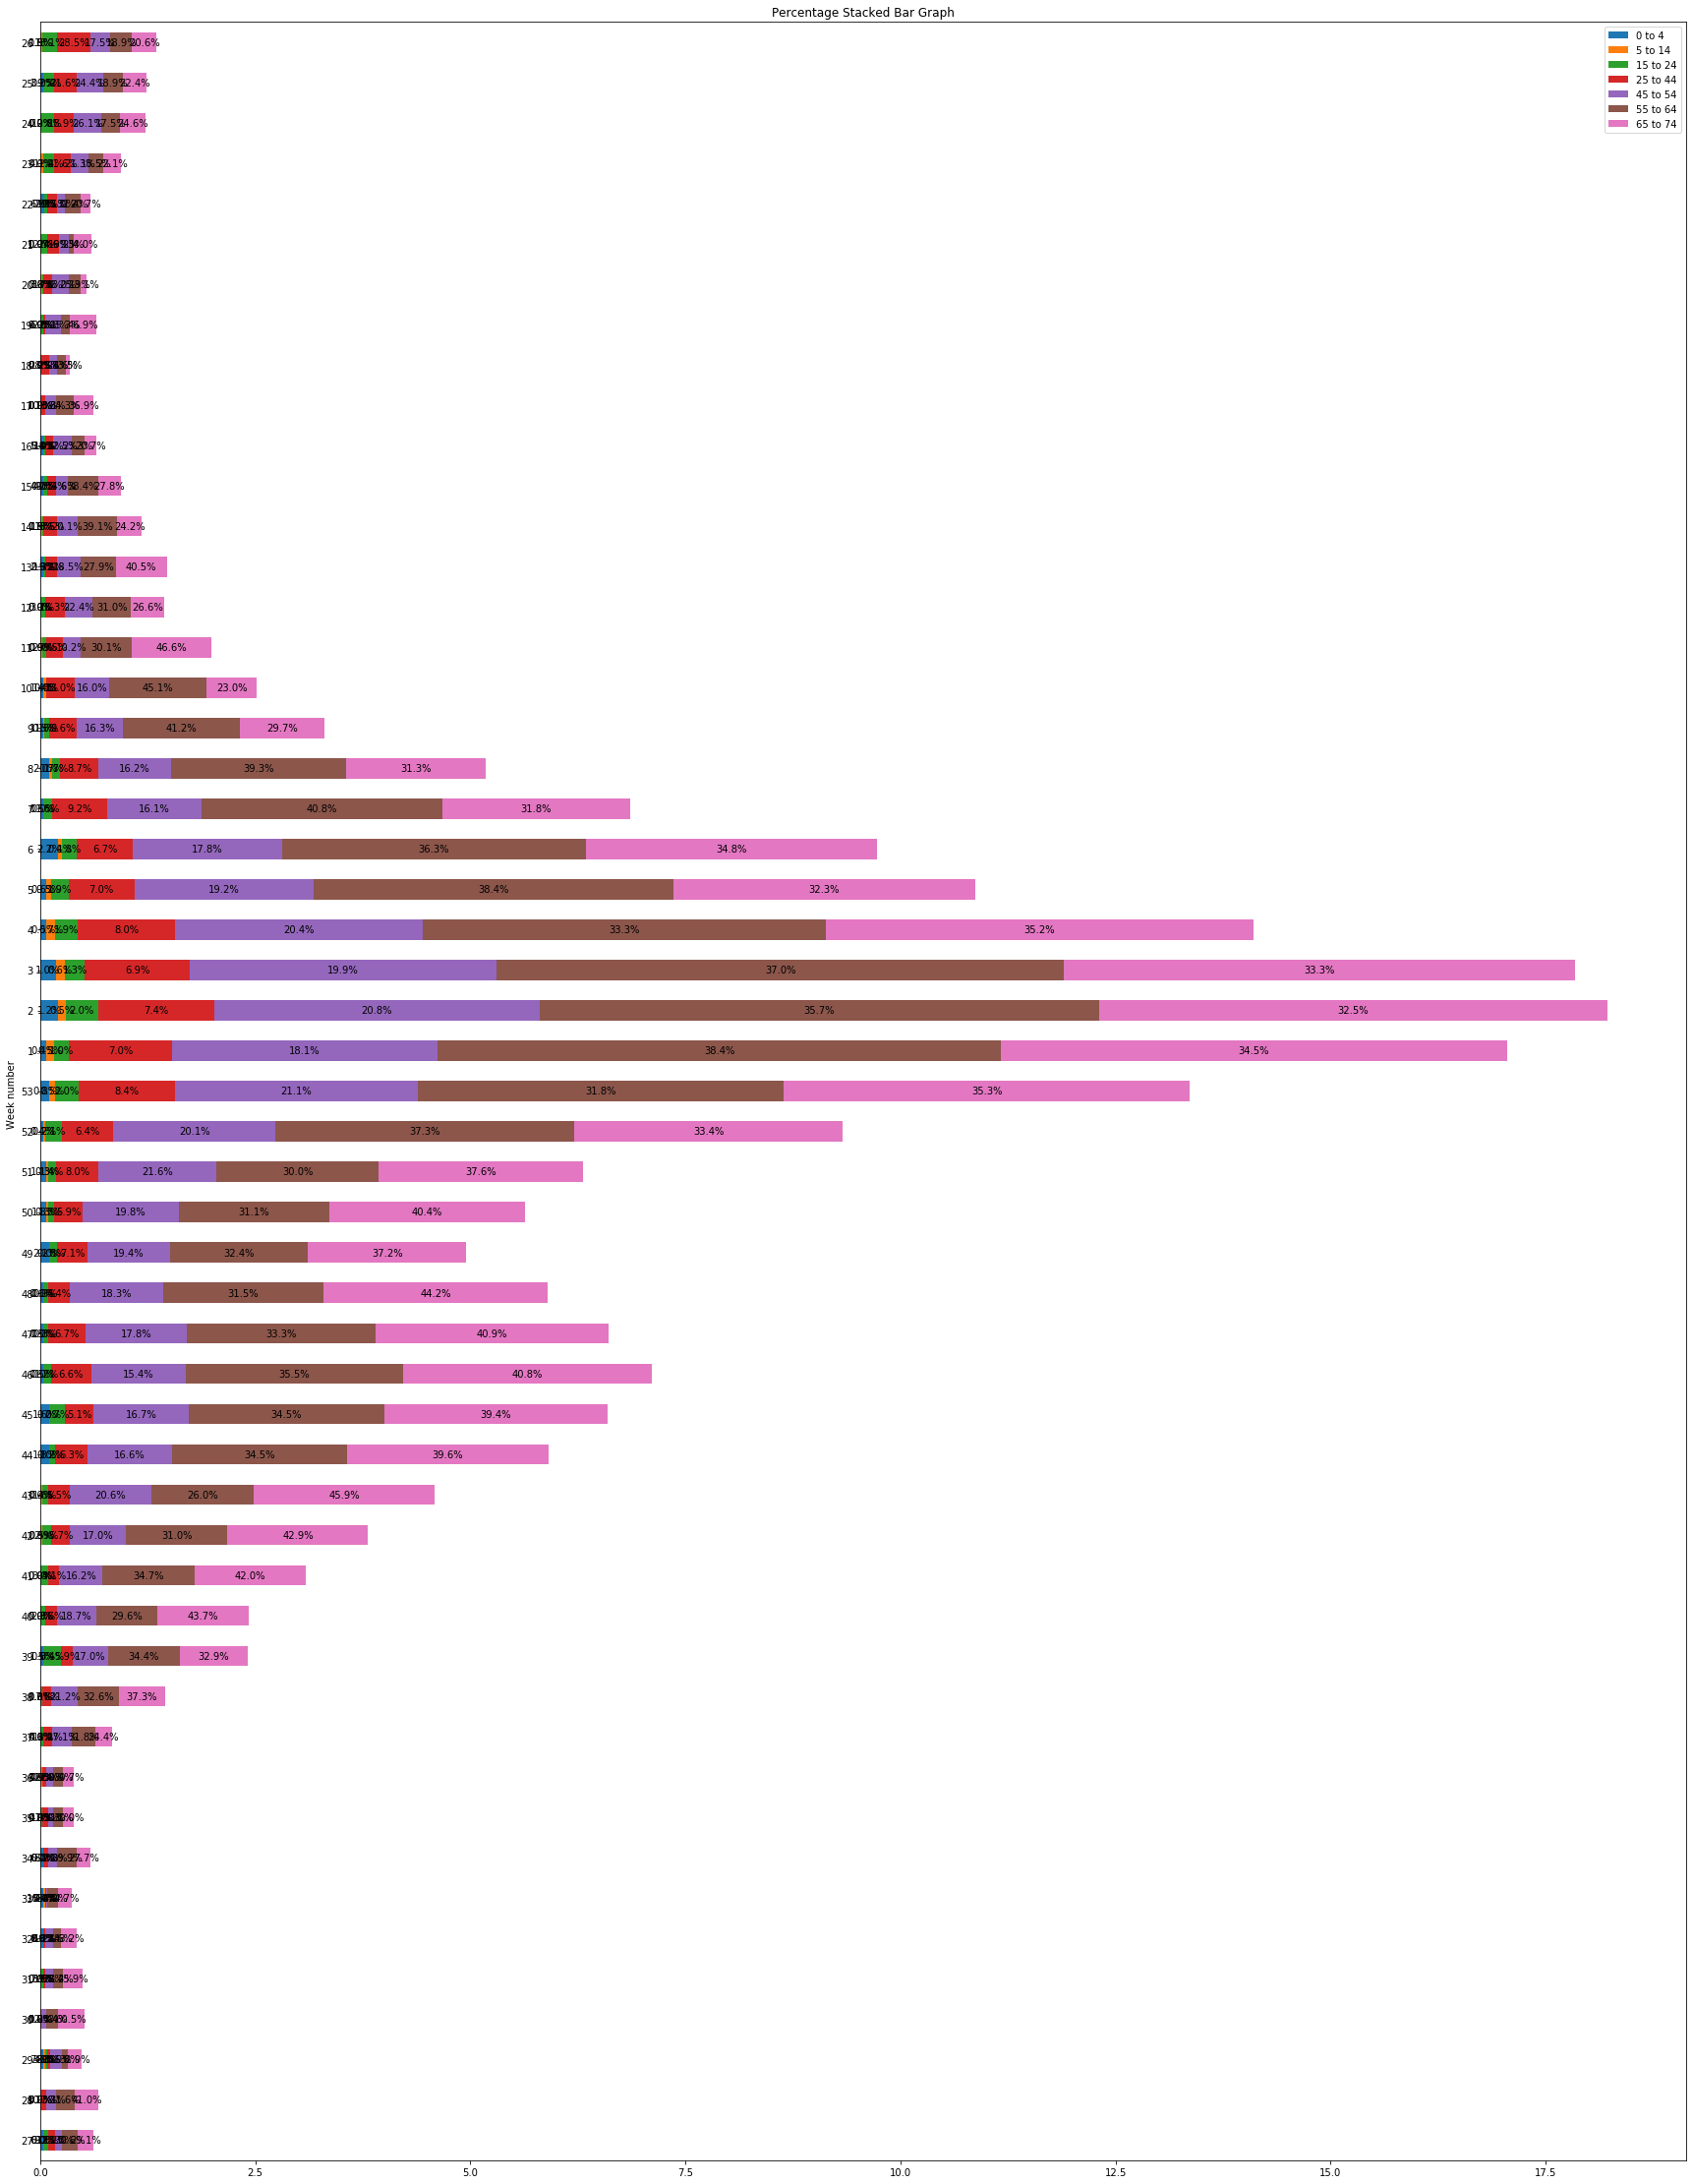

In [113]:
df = death_by_age.iloc[:,2:10]
# plot a Stacked Bar Chart using matplotlib
df.plot(
  x = df.columns[0], 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True, figsize=(30, 40))
  
df_total = df["0 to 4"] + df["5 to 14"] + df["15 to 24"]+ df["25 to 44"]+ df["45 to 54"]+ df["55 to 64"]+ df["65 to 74"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center')

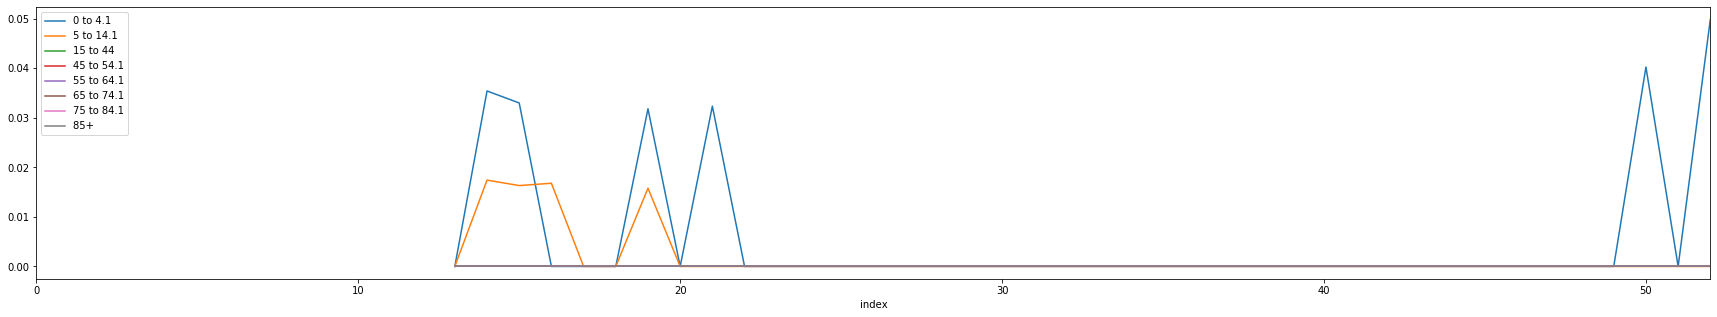

In [8]:
death_by_age.plot(x='index',y=death_by_age.columns[13:],kind='line',figsize=(30, 5), subplots=False)

In [9]:
#(a) 28 day definition
death_by_age_pyramid = pd.read_excel(filespath + fileslist[0],sheet_name="Fig49CleanData", header = 1)
death_by_age_pyramid.head(10)

,index,age,Male,Female
0,0,<5 years,4,2
1,1,5-9 years,1,3
2,2,10-19 years,18,10
3,3,20-29 years,67,53
4,4,30-39 years,245,179
5,5,40-49 years,705,481
6,6,50-59 years,2175,1387
7,7,60-69 years,5200,3022
8,8,70-79 years,10799,7051
9,9,80+ years,22197,23166


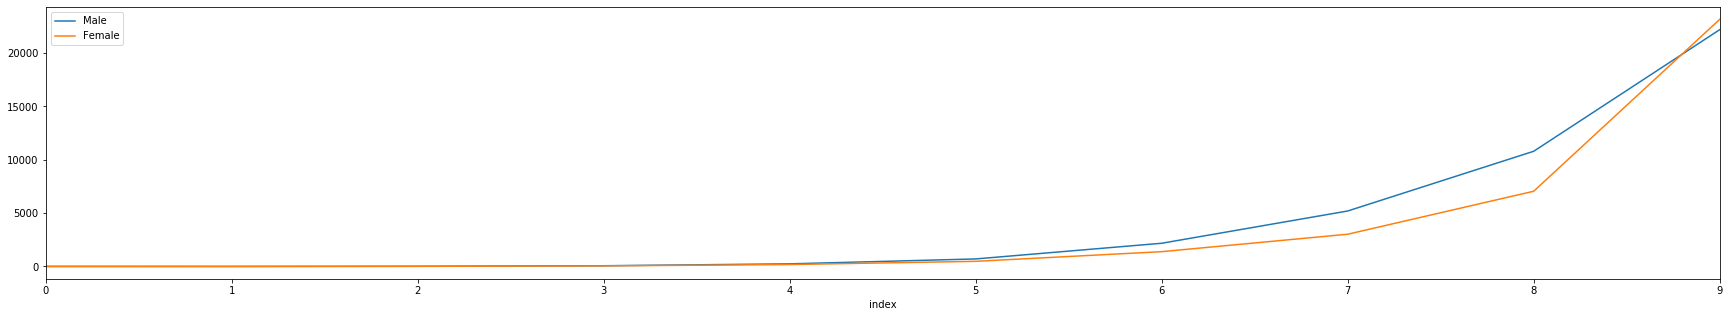

In [10]:
death_by_age_pyramid.plot(x='index', y=death_by_age_pyramid.columns[1:],kind='line',figsize=(30, 5), subplots=False)

In [11]:
age_sex_pyramid_df = pd.read_excel(filespath + fileslist[0],sheet_name="Fig49CleanData", header=1)
age_sex_pyramid_df.head(10)

,index,age,Male,Female
0,0,<5 years,4,2
1,1,5-9 years,1,3
2,2,10-19 years,18,10
3,3,20-29 years,67,53
4,4,30-39 years,245,179
5,5,40-49 years,705,481
6,6,50-59 years,2175,1387
7,7,60-69 years,5200,3022
8,8,70-79 years,10799,7051
9,9,80+ years,22197,23166


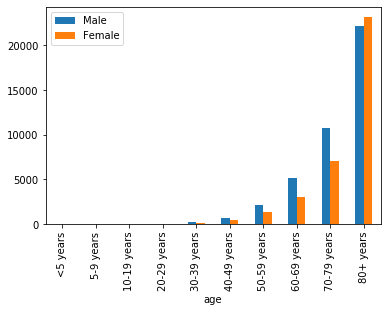

In [12]:
age_sex_pyramid_df.plot(x=age_sex_pyramid_df.columns.tolist()[1],y=age_sex_pyramid_df.columns[2:],kind='bar')

'Week number'